# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
#pip install citipy

In [20]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import datetime as dt
# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

644

In [4]:
for i, city in enumerate(cities):
    print(i, city)

0 caravelas
1 yenagoa
2 provideniya
3 bredasdorp
4 puerto ayora
5 warqla
6 mataura
7 manggar
8 castro
9 maldonado
10 kodiak
11 russkaya polyana
12 hilo
13 tura
14 arraial do cabo
15 punta arenas
16 busselton
17 longyearbyen
18 harper
19 jaguaribe
20 batagay-alyta
21 mount isa
22 zhanatas
23 hobart
24 kosonsoy
25 port elizabeth
26 north platte
27 albany
28 saint george
29 lebu
30 akdepe
31 sayyan
32 cabo san lucas
33 mayumba
34 polur
35 kawana waters
36 ixtapa
37 cape town
38 airai
39 pandan
40 saldanha
41 laurel
42 te anau
43 vaini
44 poum
45 tuktoyaktuk
46 vahan
47 formoso do araguaia
48 ushuaia
49 nantucket
50 natal
51 sur
52 hamilton
53 maghama
54 shush
55 portland
56 bar harbor
57 novorzhev
58 narsaq
59 salcininkai
60 sitka
61 forbes
62 monrovia
63 torbay
64 taraz
65 ostrovnoy
66 koplik
67 thasra
68 jamestown
69 maykain
70 sharjah
71 sentyabrskiy
72 taolanaro
73 adana
74 hithadhoo
75 fairbanks
76 honiara
77 qaqortoq
78 itaituba
79 vaitupu
80 rikitea
81 sobolevo
82 krasnyy chikoy
83

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
#base url
#url = "http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=(weather_api_key)&q=" #+ city
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

#list of city data
cityname=[]
Lat = []
Long = []
temp = []
Humidity = []
Clouds = []
Speed = []
Date = [ ]
#grouping variables
set_count =1 # group
record = 1 # record within the group

print ("Beginning Data Retrieval")
print("-----------------------")
      
for i, city in enumerate(cities):
    #group the cities in sets of 50
    if(i % 50 == 0 and i >= 50):
        set_count += 1 # make a new group
        record = 0 #reset the count of records in the new group
      
    # outpout the record and group and name of the city being processed from the list of cities
    #print(f"Processing Record {record} of Set {set_count} | {city}")
    
    #increase the record count within the set
   
   
    # create a url that includes the city
    cityURL = query_url + city
    
    # call the openweather API and make a request
    try:
        
        cityweather = requests.get(cityURL).json()
        #print(cityweather)
        
        lat = cityweather["coord"]["lat"]
        #print(lat)
        lng = cityweather["coord"]["lon"]
        #print(lng)
        maxtem = cityweather["main"]["temp_max"]
        #print(maxtem)
        humidity = cityweather["main"]["humidity"]
        #print(humidity)
        cloudiness = cityweather["clouds"]["all"]
        #print(cloudiness)
        windspeed = cityweather["wind"]["speed"]
        #print(windspeed)
        date = cityweather["dt"]
        #print(date)
       
        cityname.append(city)
        
        Lat.append(lat)
       
        Long.append(lng)
       
        temp.append(maxtem)
        
        Humidity.append(humidity)
       
        Speed.append(windspeed)
        
        Clouds.append(cloudiness)
       
        Date.append(date)
       
        print(f"Processing Record {record} of Set {set_count} | {city}") 
        record+=1
        
    except:
        print(f"{city} not found. Skipping....")
        
  

Beginning Data Retrieval
-----------------------
Processing Record 1 of Set 1 | caravelas
Processing Record 2 of Set 1 | yenagoa
Processing Record 3 of Set 1 | provideniya
Processing Record 4 of Set 1 | bredasdorp
Processing Record 5 of Set 1 | puerto ayora
warqla not found. Skipping....
Processing Record 6 of Set 1 | mataura
Processing Record 7 of Set 1 | manggar
Processing Record 8 of Set 1 | castro
Processing Record 9 of Set 1 | maldonado
Processing Record 10 of Set 1 | kodiak
Processing Record 11 of Set 1 | russkaya polyana
Processing Record 12 of Set 1 | hilo
Processing Record 13 of Set 1 | tura
Processing Record 14 of Set 1 | arraial do cabo
Processing Record 15 of Set 1 | punta arenas
Processing Record 16 of Set 1 | busselton
Processing Record 17 of Set 1 | longyearbyen
Processing Record 18 of Set 1 | harper
Processing Record 19 of Set 1 | jaguaribe
Processing Record 20 of Set 1 | batagay-alyta
Processing Record 21 of Set 1 | mount isa
zhanatas not found. Skipping....
Processing

Processing Record 2 of Set 5 | coahuayana
Processing Record 3 of Set 5 | melendugno
Processing Record 4 of Set 5 | new norfolk
Processing Record 5 of Set 5 | giyani
mys shmidta not found. Skipping....
Processing Record 6 of Set 5 | muravlenko
Processing Record 7 of Set 5 | kitimat
kamenskoye not found. Skipping....
Processing Record 8 of Set 5 | dingle
Processing Record 9 of Set 5 | esperance
Processing Record 10 of Set 5 | nome
Processing Record 11 of Set 5 | katsuura
Processing Record 12 of Set 5 | axim
Processing Record 13 of Set 5 | nata
Processing Record 14 of Set 5 | great yarmouth
Processing Record 15 of Set 5 | lieksa
lugovskiy not found. Skipping....
Processing Record 16 of Set 5 | westport
Processing Record 17 of Set 5 | bonavista
Processing Record 18 of Set 5 | solnechnyy
Processing Record 19 of Set 5 | uvarovo
Processing Record 20 of Set 5 | gamboma
taburi not found. Skipping....
Processing Record 21 of Set 5 | jijiang
Processing Record 22 of Set 5 | aksarka
Processing Reco

Processing Record 4 of Set 9 | garowe
Processing Record 5 of Set 9 | kibaya
Processing Record 6 of Set 9 | shirvan
Processing Record 7 of Set 9 | evensk
aflu not found. Skipping....
Processing Record 8 of Set 9 | deloraine
Processing Record 9 of Set 9 | lincoln
Processing Record 10 of Set 9 | najran
Processing Record 11 of Set 9 | castelfiorentino
Processing Record 12 of Set 9 | gazimurskiy zavod
Processing Record 13 of Set 9 | maxixe
Processing Record 14 of Set 9 | oum hadjer
Processing Record 15 of Set 9 | teutonia
Processing Record 16 of Set 9 | nokaneng
Processing Record 17 of Set 9 | beloha
Processing Record 18 of Set 9 | caluquembe
Processing Record 19 of Set 9 | okulovka
Processing Record 20 of Set 9 | buzmeyin
Processing Record 21 of Set 9 | kavaratti
tabialan not found. Skipping....
Processing Record 22 of Set 9 | mackenzie
Processing Record 23 of Set 9 | shenzhen
Processing Record 24 of Set 9 | baykit
Processing Record 25 of Set 9 | hambantota
Processing Record 26 of Set 9 | 

Processing Record 4 of Set 13 | dicabisagan
Processing Record 5 of Set 13 | mwanza
Processing Record 6 of Set 13 | berezovyy
Processing Record 7 of Set 13 | pinega
Processing Record 8 of Set 13 | yugo-kamskiy
Processing Record 9 of Set 13 | pyaozerskiy
Processing Record 10 of Set 13 | ushi
vreed en hoop not found. Skipping....
Processing Record 11 of Set 13 | verkhovye
Processing Record 12 of Set 13 | kununurra
Processing Record 13 of Set 13 | yanam
ye not found. Skipping....
Processing Record 14 of Set 13 | dire dawa
Processing Record 15 of Set 13 | tanete
Processing Record 16 of Set 13 | catamayo
Processing Record 17 of Set 13 | ugoofaaru
Processing Record 18 of Set 13 | kutum
Processing Record 19 of Set 13 | san roque
Processing Record 20 of Set 13 | ust-kulom
Processing Record 21 of Set 13 | maragheh
Processing Record 22 of Set 13 | fasa
Processing Record 23 of Set 13 | moroni
Processing Record 24 of Set 13 | salalah
Processing Record 25 of Set 13 | macusani
Processing Record 26 of

In [12]:
weather = {'City': cityname , 	'Lat' : Lat , 	'Lng' :Long	,'Max Temp':temp , 
           'Humidity' :Humidity , 	'Cloudiness':Clouds , 'Wind Speed' : Speed,	'Country Date' : Date}
data = pd.DataFrame(weather)
data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country Date
0,caravelas,-17.7125,-39.2481,71.64,92,0,4.52,1626745679
1,yenagoa,4.9247,6.2642,73.17,91,81,3.76,1626745779
2,provideniya,64.3833,-173.3000,50.11,81,90,8.95,1626745706
3,bredasdorp,-34.5322,20.0403,49.32,93,100,4.61,1626745625
4,puerto ayora,-0.7393,-90.3518,72.55,93,75,5.01,1626745659


In [13]:
data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country Date
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,5.830000e+02
mean,19.294978,12.926087,68.995009,71.737564,54.703259,7.317358,1.626746e+09
std,33.476199,88.136639,13.725033,19.206727,39.543826,5.562381,1.151694e+02
min,-54.800000,-175.200000,36.300000,10.000000,0.000000,0.000000,1.626745e+09
25%,-8.801450,-65.269550,59.325000,62.000000,11.000000,3.375000,1.626746e+09
50%,21.346900,18.336800,71.040000,76.000000,62.000000,5.860000,1.626746e+09
75%,48.945600,83.728150,79.670000,86.000000,96.000000,9.945000,1.626746e+09
max,78.218600,179.316700,104.140000,100.000000,100.000000,30.820000,1.626746e+09


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [14]:
data.to_csv('weather_data.csv')

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
#  Get the indices of cities that have humidity over 100%.


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

Text(0, 0.5, 'Maxt Temperature')

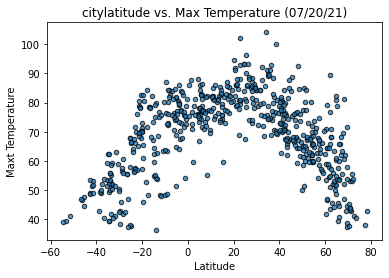

In [43]:
date = dt.date.today().strftime("%m/%d/%y")
plt.scatter(data['Lat'] , data['Max Temp'] , marker = 'o' , edgecolors = 'k' ,s = 20 , alpha = 0.75)
plt.title('citylatitude vs. Max Temperature ({})'.format(date))
plt.xlabel('Latitude')
plt.ylabel('Maxt Temperature')

## Latitude vs. Humidity Plot

FileNotFoundError: [Errno 2] No such file or directory: 'Output/City Latitude vs. Humidity.png'

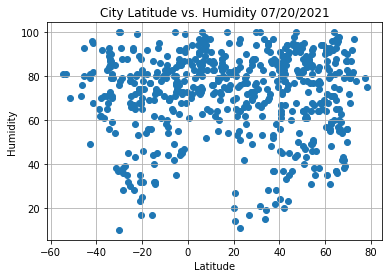

In [44]:
# Build a scatter plot for each data type
plt.scatter(data["Lat"], data["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Humidity {time.strftime("%m/%d/%Y")}')
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output/City Latitude vs. Humidity.png")

# Show plot
plt.show()


## Latitude vs. Cloudiness Plot

FileNotFoundError: [Errno 2] No such file or directory: 'Output/City Latitude vs. Cloudiness.png'

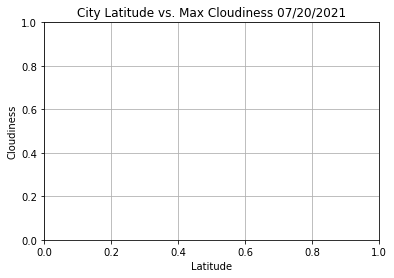

In [48]:
# Incorporate the other graph properties
plt.title(f'City Latitude vs. Max Cloudiness {time.strftime("%m/%d/%Y")}')
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True) 

# Save the figure
plt.savefig("Output/City Latitude vs. Cloudiness.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

In [35]:
# Build a scatter plot for each data type
plt.scatter(data["Lat"], data["windspeed"], marker="o")

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Wind Speed {time.strftime("%m/%d/%Y")}')
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output/City Latitude vs. Wind Speed.png")

# Show plot
plt.show()

KeyError: 'windspeed'

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression